# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# file = "../output_data/cities.csv"

# cities = pd.read_csv(file)
# cities.head()

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
 #URL toGET requests to retrieve the weather data
# url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
# query_url = url + weather_api_key



url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"



# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# query_url


# for unit in units:
#     # Build query URL based on current element in units
#     query_url = url + "appid=" + http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1ea7aa6d2ff7e57f0001448188993e6e + "&q=" + city + "&units=" + unit
    
    
    


weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

#weather_response = requests.get(target_url)
#weather_json = weather_response.json()
# print(json.dumps(weather_json, indent=4, sort_keys=True))

# Use json.dumps to print the json
print(json.dumps(weather_json, indent=4))

{
    "cod": "404",
    "message": "city not found"
}


In [8]:
       
# Set Up Lists to Hold Reponse Info
country = []
city_name = []
date = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

 #print record log of each city as it'sbeing processed (with the city number and city name)
# #Process each record starting at one

record_log = 1




# Create a loop that loops through the list of cities 
# #Perform a request on each city

for city in cities:

# Exception Handling for when a city is not found
    try:
        response = requests.get(query_url + city).json()
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing  {record_log} | {city_record}")
        
        #Have record log increase by one each time
        record_log += 1
        
    #Add exception for when a city is not found    
    except:
        print("No Record for City. Searching...") 
    pass

# Print Ending Log Statement
print(f"-------------------------------")
print(f"No More Records to Process")
print(f"-------------------------------")


Processing  1 | Buchanan
No Record for City. Searching...
Processing  2 | Busselton
Processing  3 | Hilo
Processing  4 | Tasiilaq
No Record for City. Searching...
Processing  5 | Mataura
Processing  6 | Rikitea
Processing  7 | Provideniya
Processing  8 | Antalaha
Processing  9 | Hobart
Processing  10 | Verāval
Processing  11 | Vaini
Processing  12 | Carnarvon
Processing  13 | Gillette
Processing  14 | Sitka
No Record for City. Searching...
Processing  15 | Punta Arenas
Processing  16 | Esperance
Processing  17 | Te Anau
No Record for City. Searching...
Processing  18 | Cape Town
Processing  19 | Barrow
Processing  20 | Nikolskoye
Processing  21 | Atar
Processing  22 | Longyearbyen
Processing  23 | Khatanga
Processing  24 | Ivankiv
Processing  25 | Ushuaia
Processing  26 | Tekirdağ
Processing  27 | Cabo San Lucas
Processing  28 | Atuona
No Record for City. Searching...
Processing  29 | Samaná
Processing  30 | Guanare
Processing  31 | Longonjo
Processing  32 | Touros
Processing  33 | Ava

Processing  276 | Camaná
Processing  277 | Gizo Government Station
No Record for City. Searching...
No Record for City. Searching...
Processing  278 | Mogadishu
Processing  279 | Olafsvik
Processing  280 | Grand Gaube
No Record for City. Searching...
Processing  281 | Nioro
Processing  282 | Erzin
Processing  283 | Carahue
Processing  284 | Maïné Soroa
Processing  285 | George Town
Processing  286 | Isangel
No Record for City. Searching...
Processing  287 | Jalu
Processing  288 | Arrondissement de Libourne
No Record for City. Searching...
Processing  289 | Sampit
Processing  290 | North Myrtle Beach
Processing  291 | Caranavi
Processing  292 | Nara
Processing  293 | Nabire
Processing  294 | Le Port
Processing  295 | Kouroussa
Processing  296 | Faya
Processing  297 | Novyy Nekouz
Processing  298 | Eureka
Processing  299 | Los Altos Hills
Processing  300 | Vallenar
Processing  301 | La Palma
Processing  302 | Ancud
Processing  303 | Udachny
Processing  304 | Geraldton
Processing  305 | H

Processing  547 | Hayvoron
Processing  548 | Riberalta
Processing  549 | Ortigueira
Processing  550 | Corsicana
Processing  551 | San Patricio
Processing  552 | Cape Canaveral
Processing  553 | Beni Suef
Processing  554 | Andros Town
Processing  555 | Lokoja
Processing  556 | Verkhnetulomskiy
Processing  557 | Bay Roberts
Processing  558 | Banda Aceh
Processing  559 | Talcahuano
Processing  560 | Taoudenni
Processing  561 | Soe
Processing  562 | Mana
Processing  563 | Twentynine Palms
No Record for City. Searching...
Processing  564 | Encruzilhada do Sul
Processing  565 | La Ronge
Processing  566 | Riyadh
Processing  567 | Luan
Processing  568 | São José da Coroa Grande
Processing  569 | Poconé
Processing  570 | Belmonte
Processing  571 | Yangi Marg`ilon
Processing  572 | Harlingen
Processing  573 | Samfya
Processing  574 | Havre-St-Pierre
Processing  575 | Emba
Processing  576 | Boende
Processing  577 | Alma
Processing  578 | Tricase
Processing  579 | Pontes e Lacerda
Processing  580 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Create a Pandas Dataframe from the Json Array

weather_dict = {"Date": date, "Country": country, "City": city_name,  
              "Latitude": lat, "Longtitue": long, "Humidity": humidity,
              "Max Temperature": max_temp, "Windspeed": wind_speed, "Cloudiness": cloudiness}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()



,Date,Country,City,Latitude,Longtitue,Humidity,Max Temperature,Windspeed,Cloudiness
0,1617334630,LR,Buchanan,5.8808,-10.0467,93,77.23,2.28,89
1,1617334631,AU,Busselton,-33.6500,115.3333,77,73.00,1.99,49
2,1617334632,US,Hilo,19.7297,-155.0900,65,77.00,10.36,90
3,1617334632,GL,Tasiilaq,65.6145,-37.6368,93,33.80,3.44,90
4,1617334633,NZ,Mataura,-46.1927,168.8643,67,55.99,17.00,9


In [10]:
# Export and save weather_data into a csv file

weather_data.to_csv("weather_data.csv")



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
high_humidity_check = weather_data[weather_data["Humidity"] > 100]
high_humidity_check

,Date,Country,City,Latitude,Longtitue,Humidity,Max Temperature,Windspeed,Cloudiness


In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

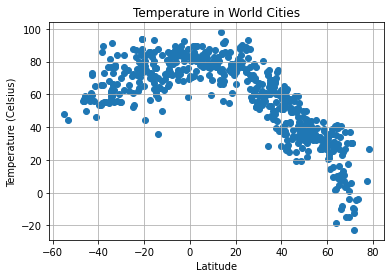

In [14]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression